In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.svm import LinearSVR

In [2]:
filepath = 'Datasets/Kaggle Transformed/Life Expectancy Kaggle Transformed.csv'
df = pd.read_csv(filepath)
df.head(5)


,Country,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2000,54.8,321.0,4.488636,0.01,2.435800,62.0,8.784622,12.2,24.0,8.20,24.0,0.09531,2.3,0.338,5.5
1,Afghanistan,2001,55.3,316.0,4.488636,0.01,2.448824,63.0,9.078294,12.6,35.0,7.80,33.0,0.09531,2.1,0.340,5.9
2,Afghanistan,2002,56.2,3.0,4.488636,0.01,2.884094,64.0,7.818832,13.0,36.0,7.76,36.0,0.09531,19.9,0.341,6.2
3,Afghanistan,2003,56.7,295.0,4.477337,0.01,2.492300,65.0,6.683361,13.4,41.0,8.82,41.0,0.09531,19.7,0.373,6.5
4,Afghanistan,2004,57.0,293.0,4.477337,0.02,2.790924,67.0,6.146329,13.8,5.0,8.79,5.0,0.09531,19.5,0.381,6.8


In [3]:
df.shape

(2445, 17)

In [4]:
df.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Income composition of resources,Schooling
count,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000
mean,2007.000000,68.795051,166.644581,1.778990,4.309732,4.384322,75.975869,3.336194,37.669816,82.087117,5.769072,81.998364,0.534850,5.084172,0.614865,11.815174
std,4.321378,9.260263,125.082974,1.641382,3.937997,2.406080,28.413085,3.253641,19.778206,23.469941,2.307287,23.702742,0.796665,4.531485,0.207476,3.162035
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.095310,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,76.000000,0.000000,0.680000,2.876656,67.000000,0.000000,18.800000,77.000000,4.240000,78.000000,0.095310,1.700000,0.487000,10.000000
50%,2007.000000,71.800000,146.000000,1.386294,3.410000,4.519192,89.000000,2.833213,42.700000,92.000000,5.620000,92.000000,0.095310,3.500000,0.666000,12.200000
75%,2011.000000,75.000000,227.000000,3.044522,7.170000,6.158738,96.000000,5.869297,55.500000,97.000000,7.200000,97.000000,0.641854,7.400000,0.760000,13.900000
max,2014.000000,89.000000,723.000000,7.496097,17.870000,9.850211,99.000000,12.265209,77.100000,99.000000,14.390000,99.000000,3.943522,27.700000,0.936000,20.700000


In [5]:
X = df.drop(['Year', 'Country', 'Life expectancy'], axis=1)  # Features
y = df['Life expectancy'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train



array([[-0.7373628 , -1.086332  ,  1.96574664, ..., -0.74562111,
         1.19545595,  1.03884925],
       [-0.11514297,  1.33133006,  0.82070943, ..., -0.48067994,
         0.49459412,  0.62961195],
       [-1.04847272,  0.80534135,  1.50057527, ..., -0.48067994,
         0.46144525,  0.09445547],
       ...,
       [ 1.00166186,  0.23927439,  0.67246801, ..., -0.59107209,
         0.59404073,  0.66109174],
       [-1.15217602, -1.086332  ,  1.9913055 , ..., -0.43652308,
         0.85449614,  1.41660676],
       [ 1.01761621,  1.16863947, -0.71793431, ...,  0.66739845,
        -0.53302086, -1.16473623]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_data = pca.fit(X_train)
pca_data.explained_variance_ratio_

array([0.36721378, 0.11420297, 0.09167212, 0.08195833, 0.06151921,
       0.0500458 , 0.04579929, 0.03772272, 0.03598271, 0.03012251])

In [8]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([36.72, 48.14, 57.31, 65.51, 71.66, 76.66, 81.24, 85.01, 88.61,
       91.62])

In [9]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(1956, 10)

In [10]:

for i in ['linear','poly','rbf']:
    ker = SVR(kernel = i, gamma = 'auto')
    ker.fit(X_train, y_train)
    ker_train= ker.score(X_train,y_train)
    ker_test = ker.score(X_test, y_test)
    print('For the', i,'kernel, the train score is: {:.4f}'.format(ker_train))
    print('For the', i,'kernel, the test score is: {:.4f}'.format(ker_test))
    print('\n')

For the linear kernel, the train score is: 0.8289
For the linear kernel, the test score is: 0.8447


For the poly kernel, the train score is: 0.8036
For the poly kernel, the test score is: 0.7733


For the rbf kernel, the train score is: 0.8848
For the rbf kernel, the test score is: 0.8718




# SVM with Kernel Linear

In [11]:

#Tuning using GridSearchCV 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_ker_lin = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv = 5, return_train_score=True)
grid_ker_lin.fit(X_train,y_train)

print("Best parameters for kernel SVR linear: {}".format(grid_ker_lin.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_lin.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}
Best parameters for kernel SVR linear: {'C': 0.1, 'epsilon': 2.0}
Best cross-validationscore: 0.83


In [12]:
best_kerlinsvr = SVR( kernel = 'linear', C=0.1, epsilon = 2.0)
best_kerlinsvr.fit(X_train, y_train)
ykerlinsvr_predicted = best_kerlinsvr.predict(X_test)

print('Train score(R2): {:.4f}'.format(best_kerlinsvr.score(X_train, y_train)))
print('Test score(R2): {:.4f}'.format(best_kerlinsvr.score(X_test, y_test)))
MSE = np.square(np.subtract(y_test,ykerlinsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))
RMSE = np.sqrt(MSE)
print('RMSE: {:.4f}'.format(RMSE))

Train score(R2): 0.8307
Test score(R2): 0.8437
MSE: 13.9268
RMSE: 3.7319


In [13]:
from sklearn.model_selection import cross_val_score


# SVR with best hyper parameter
svr = SVR(kernel='linear', C=0.1, epsilon=2.0, gamma = 0.001)

# MSE Cross-validation with 5 folds
scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean of RMSE 
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)


Cross-Validation RMSE scores: [3.78304471 3.83361762 3.75132962 3.92978226 3.77521671]
Mean RMSE: 3.8145981817702337


In [14]:
# SVR with best hyper parameter
svr = SVR(kernel='linear', C=0.1, epsilon=2.0, gamma=0.001)

# R2 - Cross-validation with 5 folds
r2_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

# Mean of R2 score
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print("Cross-Validation R² scores:", r2_scores)
print("Mean R² score:", mean_r2)


Cross-Validation R² scores: [0.82417358 0.82045719 0.83565312 0.83298748 0.8264304 ]
Mean R² score: 0.827940352712995


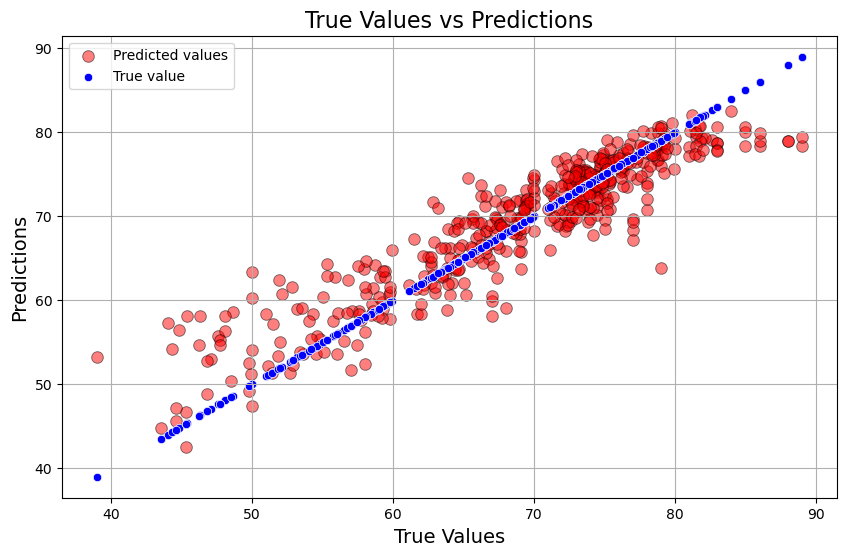

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ykerlinsvr_predicted, color='red', alpha=0.5, s=70, edgecolor='k', label='Predicted values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='True value')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.title("True Values vs Predictions", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


# SVR with Kernel RBF

In [16]:
#Tuning GridSearchCV 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}

grid_ker_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 5, return_train_score=True)
grid_ker_rbf.fit(X_train,y_train)

print("Best parameters for kernel rbf: {}".format(grid_ker_rbf.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_rbf.best_score_))
print('Train score(R2): {:.4f}'.format(grid_ker_rbf.score(X_train, y_train)))
print('Test score(R2): {:.4f}'.format(grid_ker_rbf.score(X_test, y_test)))

Best parameters for kernel rbf: {'C': 100, 'epsilon': 1.0, 'gamma': 0.1}
Best cross-validationscore: 0.91
Train score(R2): 0.9723
Test score(R2): 0.9212


In [17]:
best_kerrbfsvr = SVR( kernel = 'rbf', C=100, gamma=0.1, epsilon=1.0)
best_kerrbfsvr.fit(X_train, y_train)
ykerrbfsvr_predicted = best_kerrbfsvr.predict(X_test)

MSE = np.square(np.subtract(y_test,ykerrbfsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))
RMSE = np.sqrt(MSE)
print('RMSE: {:.4f}'.format(RMSE))

MSE: 7.0226
RMSE: 2.6500


In [18]:
from sklearn.model_selection import cross_val_score


# SVR with best hyper parameter
svr = SVR(kernel='rbf', C=100, epsilon=1.0, gamma=0.1)

# MSE Cross-validation with 5 folds
scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean of RMSE 
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)


Cross-Validation RMSE scores: [2.59022156 2.79601441 2.59617214 3.1585881  2.80293696]
Mean RMSE: 2.788786633907402


In [19]:
# SVR with best hyper parameter
svr = SVR(kernel='rbf', C=100, epsilon=1.0, gamma=0.1)

# R2 Score - Cross-validation with 5 folds
r2_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

# Mean of R2 score
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print("Cross-Validation R² scores:", r2_scores)
print("Mean R² score:", mean_r2)


Cross-Validation R² scores: [0.91757195 0.90449431 0.92128491 0.89210581 0.90432102]
Mean R² score: 0.9079556004963047


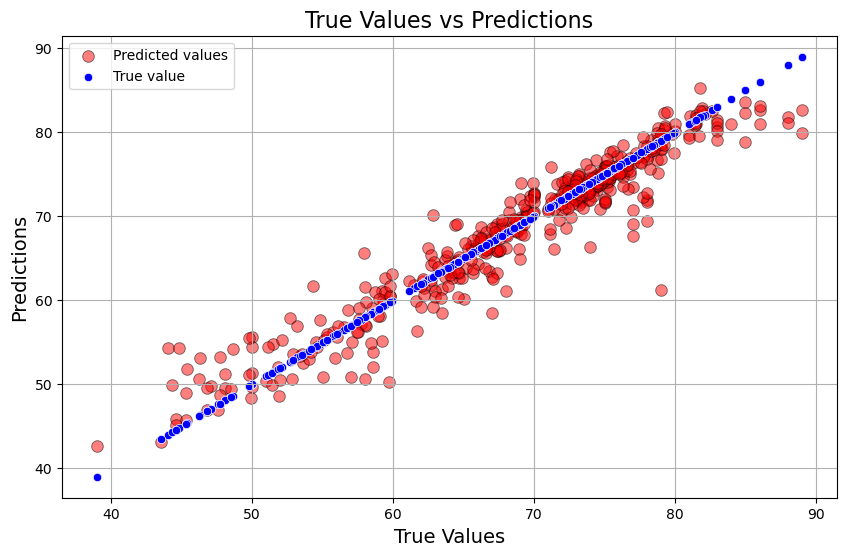

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ykerrbfsvr_predicted, color='red', alpha=0.5, s=70, edgecolor='k', label='Predicted values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='True value')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.title("True Values vs Predictions", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
